In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
df_companion_daytrip = pd.read_csv("관광_당일여행_동반자_수_분포__본인포함__20240517165914.csv")
df_companion_lodgment = pd.read_csv("관광_숙박여행_동반자_수_분포__본인포함__20240517165954.csv")

In [4]:
df_companion_daytrip

,시점,통계분류(1),통계분류(2),항목,데이터
0,2019,성별,남자,1명,5.0
1,2019,성별,남자,2~3명,58.8
2,2019,성별,남자,4~5명,27.7
3,2019,성별,남자,6~10명,3.8
4,2019,성별,남자,11~20명,1.4
...,...,...,...,...,...
420,2022,가구원수,3인이상,2~3명,59.5
421,2022,가구원수,3인이상,4~5명,34.6
422,2022,가구원수,3인이상,6~10명,2.6
423,2022,가구원수,3인이상,11~20명,0.2


In [5]:
df_companion_lodgment

,시점,통계분류(1),통계분류(2),항목,데이터
0,2022,전체,소계,1명,4.0
1,2022,전체,소계,2~3명,50.6
2,2022,전체,소계,4~5명,38.7
3,2022,전체,소계,6~10명,5.8
4,2022,전체,소계,11~20명,0.5
...,...,...,...,...,...
114,2022,가구원수,3인이상,2~3명,46.4
115,2022,가구원수,3인이상,4~5명,45.0
116,2022,가구원수,3인이상,6~10명,5.5
117,2022,가구원수,3인이상,11~20명,0.5


## 연령대별

In [43]:
item_cate = df_companion_daytrip.query("`통계분류(2)` == '20대'")
age_3040 = item_cate.groupby(['통계분류(2)', '항목'])
result = age_3040['데이터'].median().unstack()
result

항목,11~20명,1명,21명이상,2~3명,4~5명,6~10명
통계분류(2),,,,,,
20대,0.3,3.45,0.3,71.7,22.95,1.45


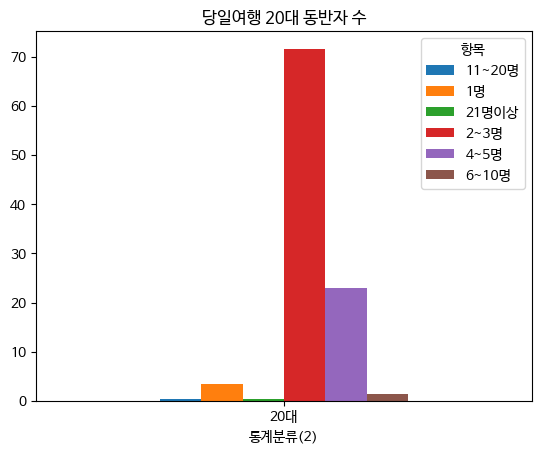

In [32]:
result.plot(kind='bar')
plt.title("당일여행 20대 동반자 수")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_31/3292284669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='항목', y='20대', data=df, palette='Blues')


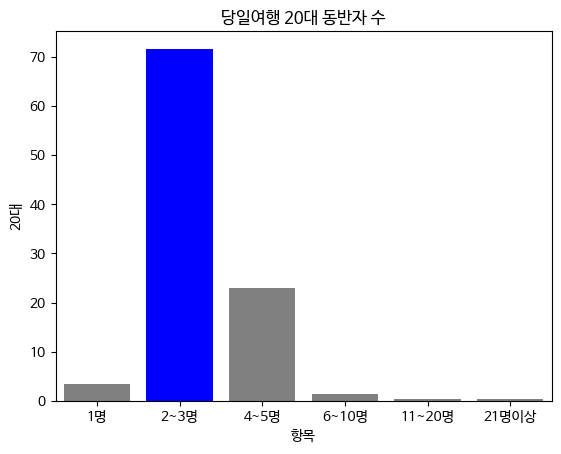

In [45]:
data = {
'항목': ['1명','2~3명', '4~5명', '6~10명','11~20명', '21명이상' ],
'20대': [3.45, 71.7, 22.95, 1.45, 0.3, 0.3]
}
df = pd.DataFrame(data)

# Seaborn 막대 그래프 생성
ax = sns.barplot(x='항목', y='20대', data=df, palette='Blues')

for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[1].set_facecolor('Blue')

plt.title("당일여행 20대 동반자 수")
plt.xticks(rotation=0)
plt.show()

In [33]:
item_cate = df_companion_lodgment.query("`통계분류(2)` == '40대'")
age_3040 = item_cate.groupby(['통계분류(2)', '항목'])
result = age_3040['데이터'].median().unstack()
result

항목,11~20명,1명,21명이상,2~3명,4~5명,6~10명
통계분류(2),,,,,,
40대,0.5,2.7,0.5,41.9,49.7,4.6


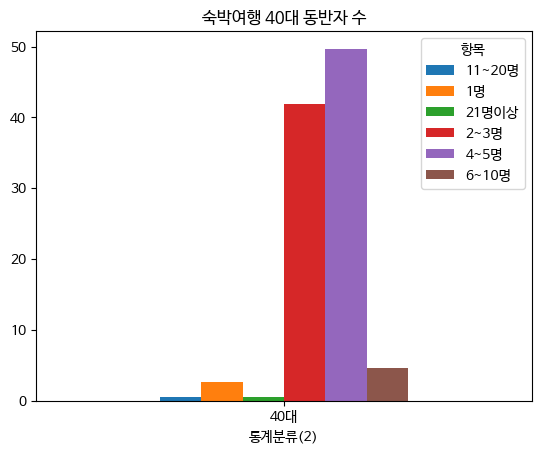

In [17]:
result.plot(kind='bar')
plt.title("숙박여행 40대 동반자 수")
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_31/3405565175.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='항목', y='40대', data=df_40s, palette='Blues')


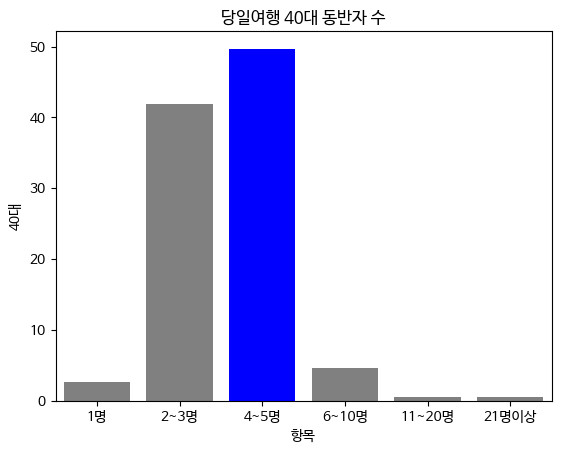

In [42]:
data_40s = {
'항목': ['1명','2~3명', '4~5명', '6~10명','11~20명', '21명이상' ],
'40대': [2.7, 41.9, 49.7, 4.6, 0.5, 0.5]
}
df_40s = pd.DataFrame(data_40s)

ax = sns.barplot(x='항목', y='40대', data=df_40s, palette='Blues')

for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[2].set_facecolor('Blue')

plt.title("당일여행 40대 동반자 수")
plt.xticks(rotation=0)
plt.show()

## 성별별

In [31]:
item_cate = df_companion_daytrip.query("`통계분류(1)` == '성별'")
age_3040 = item_cate.groupby(['항목', '통계분류(2)'])
result = age_3040['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
11~20명,0.30,0.4
1명,5.60,2.7
21명이상,0.35,0.6
2~3명,62.50,61.3
4~5명,27.95,30.9
6~10명,3.00,2.6


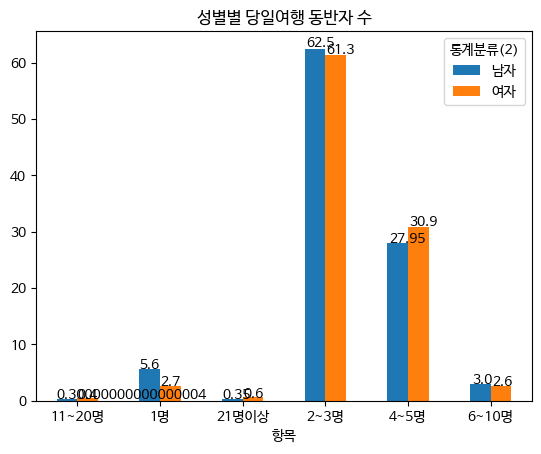

In [32]:
ax = result.plot(kind='bar')
plt.title("성별별 당일여행 동반자 수")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [26]:
item_cate = df_companion_lodgment.query("`통계분류(1)` == '성별'")
age_3040 = item_cate.groupby(['항목', '통계분류(2)'])
result = age_3040['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
11~20명,0.5,0.4
1명,4.9,3.1
21명이상,0.3,0.6
2~3명,50.6,50.6
4~5명,37.6,39.7
6~10명,6.1,5.5


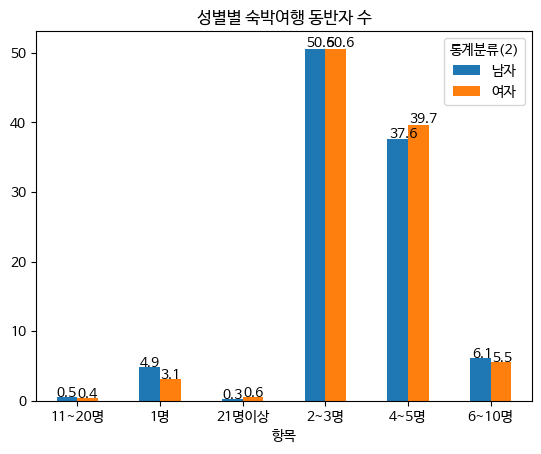

In [29]:
ax = result.plot(kind='bar')
plt.title("성별별 숙박여행 동반자 수")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

## 직업별

In [40]:
item_cate = df_companion_daytrip.query("`통계분류(1)` == '직업'")
age_3040 = item_cate.groupby(['통계분류(2)', '항목'])
result = age_3040['데이터'].median().unstack()
result

항목,11~20명,1명,21명이상,2~3명,4~5명,6~10명
통계분류(2),,,,,,
고용원없는자영업자,0.60,5.10,0.90,59.15,29.25,4.20
고용원있는사업주,1.30,4.65,0.65,55.10,32.20,2.85
기타,0.65,7.75,2.30,57.60,27.55,3.20
무급가족 종사자,3.90,2.65,8.55,54.60,31.60,4.20
임금봉급근로자,0.20,4.20,0.30,65.60,27.10,2.20
전업주부,0.70,1.85,1.00,54.80,37.45,2.75
학생,0.60,2.75,1.35,58.00,34.25,2.35


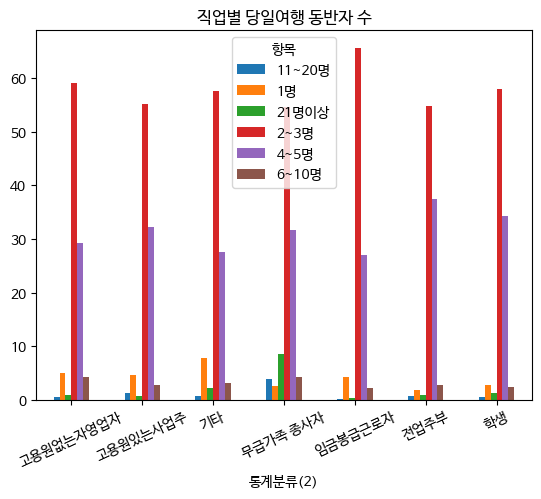

In [45]:
result.plot(kind='bar')
plt.title("직업별 당일여행 동반자 수")
plt.xticks(rotation=25)
plt.show()

In [46]:
item_cate = df_companion_lodgment.query("`통계분류(1)` == '직업'")
age_3040 = item_cate.groupby(['통계분류(2)', '항목'])
result = age_3040['데이터'].median().unstack()
result

항목,11~20명,1명,21명이상,2~3명,4~5명,6~10명
통계분류(2),,,,,,
고용원없는자영업자,0.9,4.8,0.7,46.4,40.4,6.8
고용원있는사업주,0.8,2.0,0.5,44.1,46.7,5.9
기타,NaN,7.4,1.1,52.6,30.2,8.7
무급가족 종사자,2.1,0.4,2.7,53.1,27.5,14.1
임금봉급근로자,0.3,4.0,0.2,54.2,36.6,4.6
전업주부,0.4,2.0,0.8,44.6,43.6,8.7
학생,0.4,5.1,1.1,40.4,47.2,5.8


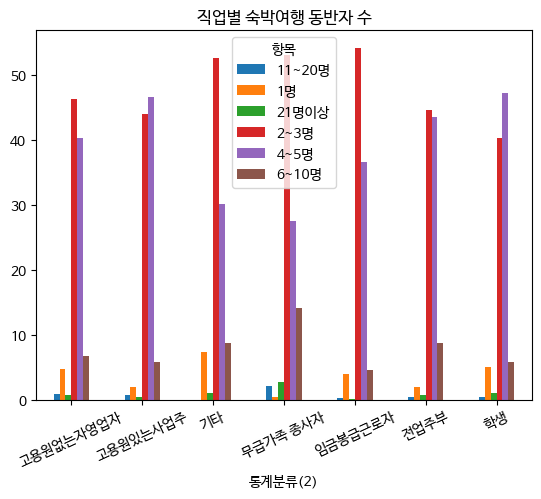

In [47]:
result.plot(kind='bar')
plt.title("직업별 숙박여행 동반자 수")
plt.xticks(rotation=25)
plt.show()

In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
data_in_destination_type = db['data_in_destination_type']
data_in_destination_type = data_in_destination_type.find()
data_in_destination_type = pd.DataFrame(data_in_destination_type)

In [3]:
gangwon = data_in_destination_type.query("region == '강원'")
gangwon

,_id,region,cate_major,cate_minor,search,year
205,664717b72581fd20a9efcc8c,강원,숙박,호텔,4520,2019
206,664717b72581fd20a9efcc8d,강원,숙박,호스텔,611,2019
207,664717b72581fd20a9efcc8e,강원,숙박,펜션/민박,101,2019
208,664717b72581fd20a9efcc8f,강원,숙박,콘도미니엄,37182,2019
209,664717b72581fd20a9efcc90,강원,숙박,캠핑,934,2019
...,...,...,...,...,...,...
406,664717b72581fd20a9efcd55,강원,쇼핑,전문매장/상가,2,2023
407,664717b72581fd20a9efcd56,강원,쇼핑,시장,3566,2023
408,664717b72581fd20a9efcd57,강원,쇼핑,쇼핑몰,70,2023
409,664717b72581fd20a9efcd58,강원,체험관광,농/산/어촌체험,296,2023


In [4]:
gangwon['cate_major'].unique()

array(['숙박', '음식', '문화관광', '레저스포츠', '자연관광', '기타관광', '역사관광', '쇼핑', '체험관광'],
      dtype=object)

In [5]:
gangwon_food = gangwon.query("cate_major == '음식'")
gangwon_food

,_id,region,cate_major,cate_minor,search,year
212,664717b72581fd20a9efcc93,강원,음식,간이음식,922,2019
213,664717b72581fd20a9efcc94,강원,음식,외국식,602,2019
214,664717b72581fd20a9efcc95,강원,음식,음식점기타,793,2019
215,664717b72581fd20a9efcc96,강원,음식,전문음식,6289,2019
216,664717b72581fd20a9efcc97,강원,음식,카페/찻집,1512,2019
217,664717b72581fd20a9efcc98,강원,음식,한식,9960,2019
255,664717b72581fd20a9efccbe,강원,음식,한식,11561,2020
256,664717b72581fd20a9efccbf,강원,음식,간이음식,1115,2020
257,664717b72581fd20a9efccc0,강원,음식,외국식,748,2020
258,664717b72581fd20a9efccc1,강원,음식,음식점기타,544,2020


In [8]:
gangwon['year'] = gangwon['year'].astype(str)
item_cate = gangwon.query("cate_major == '음식'")
age_3040 = item_cate.groupby(['year', 'cate_minor'])
result = age_3040['search'].median().unstack()
result

/tmp/ipykernel_24/2526994977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangwon['year'] = gangwon['year'].astype(str)


cate_minor,간이음식,외국식,음식점기타,전문음식,카페/찻집,한식
year,,,,,,
2019,922.0,602.0,793.0,6289.0,1512.0,9960.0
2020,1115.0,748.0,544.0,6753.0,2171.0,11561.0
2021,1774.0,1074.0,970.0,9516.0,3916.0,16851.0
2022,1884.0,1243.0,696.0,9075.0,4274.0,18611.0
2023,2166.0,1512.0,657.0,10875.0,4855.0,22255.0


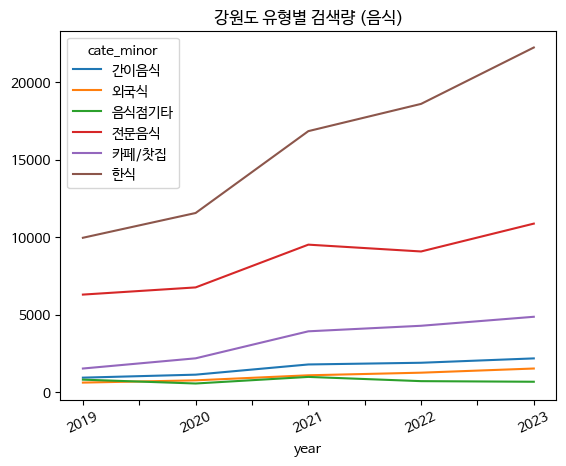

In [10]:
result.plot(kind='line')
plt.title("강원도 유형별 검색량 (음식)")
plt.xticks(rotation=25)
plt.show()